In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
FF_2021 = pd.read_excel('../LeagueHistory.xlsx', sheet_name='2022') \
            .drop(['TOTAL', 'Mean', 'Std', 'Median','Year','Playoffs','Owner','Place'],1) \
            .drop([12],0)
        
labels = np.array(FF_2021['Team_Name'])

FF_2021

,Team_Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15
0,Gee Whiz Darnell,94.62,108.86,121.10,123.98,121.68,150.10,114.94,110.54,110.94,117.18,139.92,113.30,105.84,91.56,126.20
1,Null Hypothesis,122.50,164.76,74.46,145.58,87.06,118.32,138.12,153.86,131.50,95.14,99.62,116.58,78.64,77.60,116.78
2,Pierogi Night,143.22,121.72,104.40,84.86,73.86,81.54,102.80,147.88,88.54,122.80,125.86,121.02,148.74,114.68,125.00
3,Movin' On Up,126.88,71.74,105.40,102.14,134.36,73.50,129.80,110.58,125.00,107.06,111.28,113.46,109.02,112.58,120.66
4,PurpleVector Reunion Tour,117.80,112.10,83.38,136.16,81.28,89.72,135.82,110.14,83.84,96.54,150.46,116.00,111.42,72.78,142.74
5,GOBias Industries,110.92,135.88,97.76,124.68,126.80,121.98,142.06,95.34,113.90,104.10,99.60,177.74,112.58,107.26,101.80
6,Brady = Washed Up IV,137.52,137.22,107.82,132.66,116.56,81.00,93.10,98.12,175.12,101.48,93.96,137.26,146.64,129.86,59.00
7,Pay Dirt & Pylons II,77.80,106.86,113.94,100.94,149.98,105.04,96.06,159.10,102.14,97.44,129.10,105.10,107.28,153.40,97.18
8,Sackwash Lyfe,102.48,108.38,113.30,169.02,129.46,114.86,87.12,74.62,104.40,101.20,109.70,112.76,73.84,121.00,99.60
9,Mr. Fans Noodle Haus,117.90,101.18,108.56,84.26,105.64,121.12,99.02,127.18,76.40,84.62,81.66,100.84,114.04,118.22,86.52


In [4]:
averages = np.zeros(15)
for z in range(15):
    averages[z] = np.mean(FF_2021.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(180).reshape(12, 15)
for c in range(15):
    for r in range(12):
        cumulatives[r, c] = np.sum(FF_2021.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)
average_cum_per_week

array([  112.20666667,   226.095     ,   329.50333333,   446.085     ,
         557.505     ,   661.34      ,   771.39      ,   890.67166667,
         998.89333333,  1106.46833333,  1219.79333333,  1338.525     ,
        1449.31166667,  1553.48833333,  1662.31333333])

In [5]:
cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

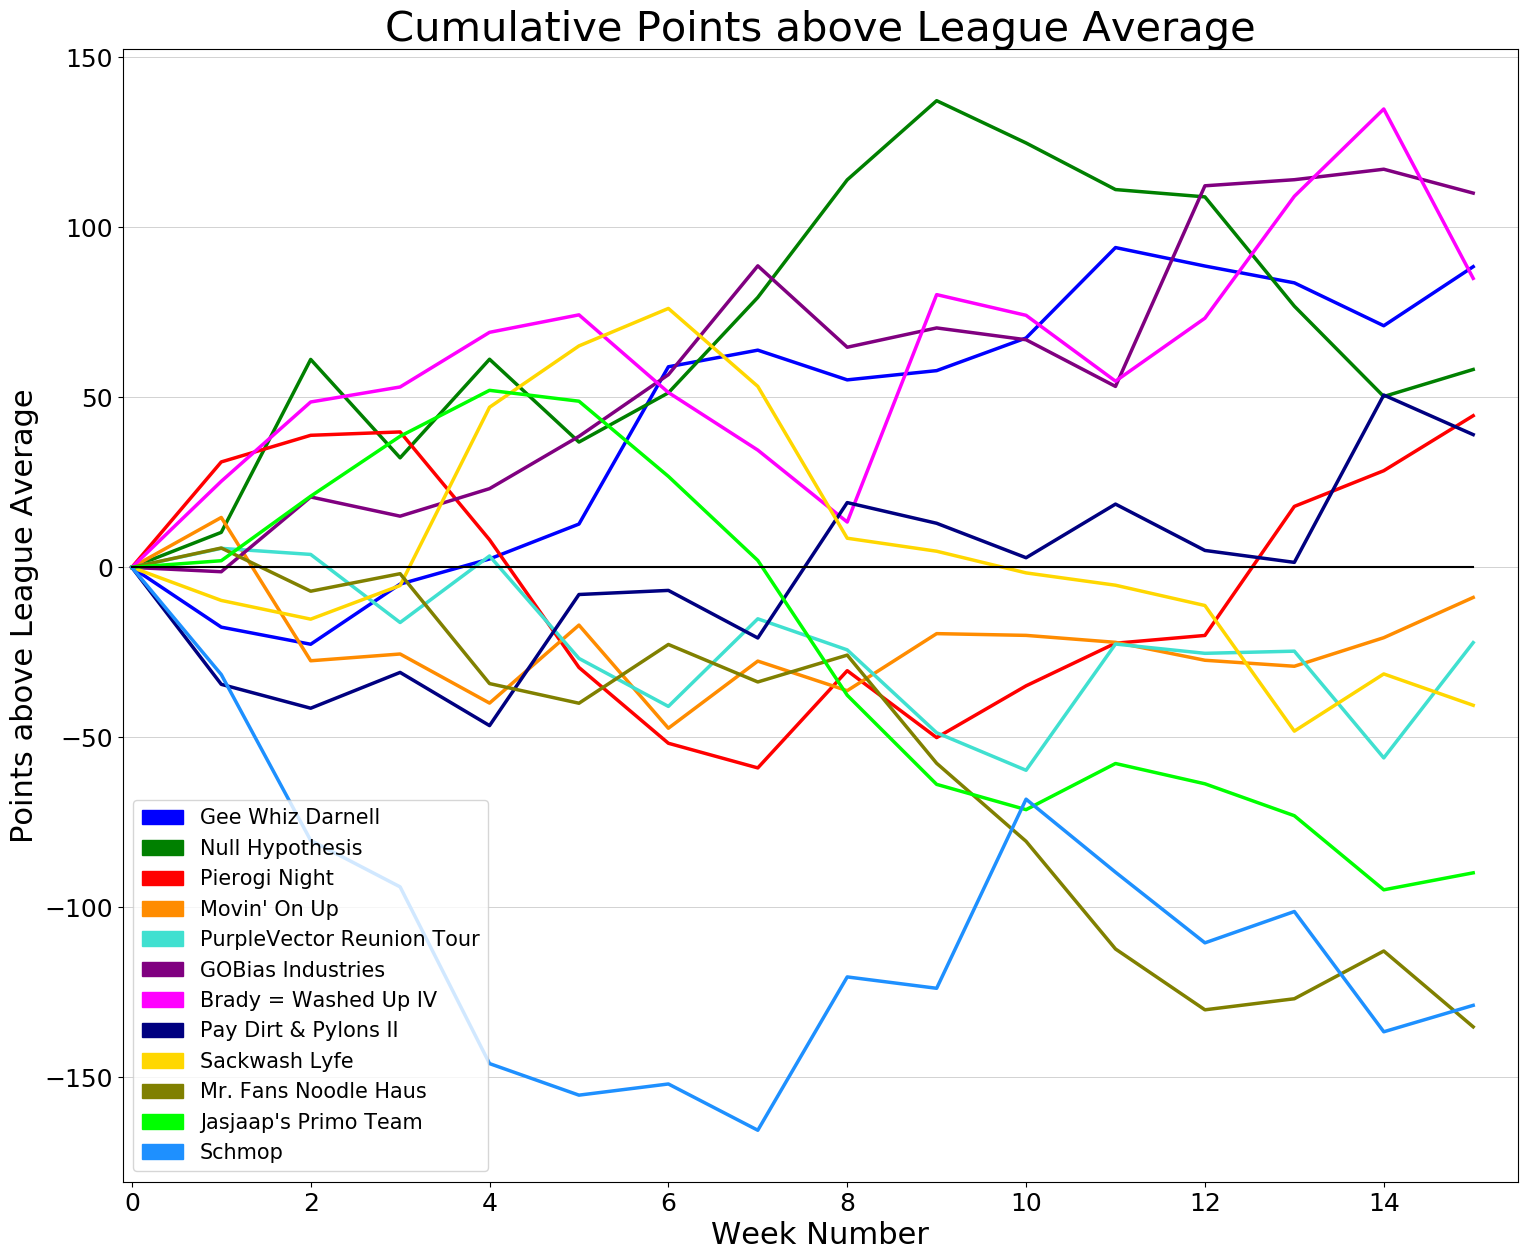

In [6]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=2.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,15], [0,0], color = 'k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':15})
plt.grid(axis='y', lw=0.4)